<a href="https://colab.research.google.com/github/PatriciaReyesAv/Female-Political-Representation/blob/main/4_4_Visualizaci%C3%B3n_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
filename='/content/drive/MyDrive/Coding Dojo/Semana 04/Viz5_August_Female_Political_Representation.xlsx'

In [24]:
df=pd.read_excel(filename)
df.head()

,Country Name,Country Code,Year,Proportion of seats held by women in national parliaments (%)
0,Albania,ALB,1997,NaN
1,Albania,ALB,1998,NaN
2,Albania,ALB,1999,0.051613
3,Albania,ALB,2000,0.051613
4,Albania,ALB,2001,0.057143


In [53]:
# 1.0 Elijan un conjunto de datos de la lista de conjuntos de datos. Pueden elegir un conjunto de datos reciente o uno de un año anterior.
# He elegido data sobre las posiciones que ocupan las mujere en representaciones politicas a lo largo d elos años
df=df.fillna(0)
df.head()

,Country Name,Country Code,Year,Proportion of seats held by women in national parliaments (%)
0,Albania,ALB,1997,0.000000
1,Albania,ALB,1998,0.000000
2,Albania,ALB,1999,0.051613
3,Albania,ALB,2000,0.051613
4,Albania,ALB,2001,0.057143


In [67]:
df=df.rename(columns={'Proportion of seats held by women in national parliaments (%)':'Porcentaje Representantes'})
df.head()

,Country Name,Country Code,Year,Porcentaje Representantes
0,Albania,ALB,1997,0.000000
1,Albania,ALB,1998,0.000000
2,Albania,ALB,1999,0.051613
3,Albania,ALB,2000,0.051613
4,Albania,ALB,2001,0.057143


In [68]:
# 2.0 Análisis de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Name               4945 non-null   object 
 1   Country Code               4945 non-null   object 
 2   Year                       4945 non-null   int64  
 3   Porcentaje Representantes  4945 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 154.7+ KB


Text(0, 0.5, 'Numero de Representantes')

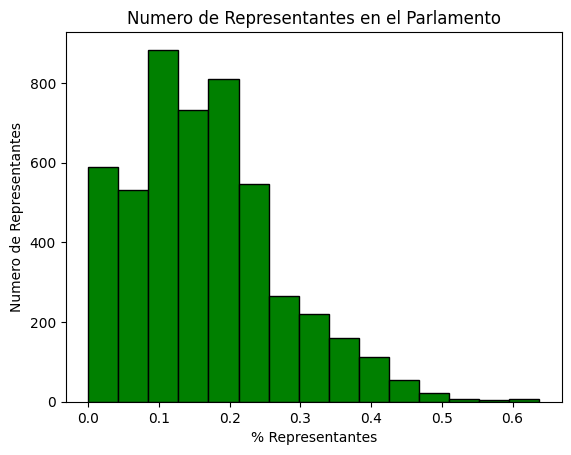

In [71]:
# Representacion en histogramas
plt.hist(df['Porcentaje Representantes'], 15,color='green',ec='black')
plt.title('Numero de Representantes en el Parlamento')
plt.xlabel('% Representantes')
plt.ylabel('Numero de Representantes')

In [82]:
# Analisis mediante mapa de calor
datos=df[['Country Code','Year','Porcentaje Representantes']]
datos_grp=datos.groupby(['Country Code','Year'])[['Porcentaje Representantes']].mean()
datos_grp

Porcentaje Representantes
Country Code Year                           
AGO          1997                   0.095455
             1998                   0.154545
             1999                   0.154545
             2000                   0.154545
             2001                   0.154545
...                                      ...
ZWE          2015                   0.314815
             2016                   0.314815
             2017                   0.325758
             2018                   0.314815
             2019                   0.318519

[4945 rows x 1 columns]

In [93]:
datos_pivot=datos_grp.pivot_table(index='Country Code', columns='Year',values='Porcentaje Representantes').round(3)
datos_pivot

Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Code,,,,,,,,,,,,,,,,,,,,,
AGO,0.095,0.155,0.155,0.155,0.155,0.155,0.155,0.150,0.150,0.150,...,0.386,0.382,0.341,0.341,0.368,0.368,0.368,0.305,0.305,0.300
ALB,0.000,0.000,0.052,0.052,0.057,0.057,0.057,0.064,0.071,0.071,...,0.164,0.157,0.157,0.179,0.200,0.207,0.229,0.279,0.279,0.295
AND,0.071,0.071,0.071,0.071,0.143,0.143,0.143,0.143,0.286,0.286,...,0.357,0.500,0.500,0.500,0.500,0.393,0.321,0.321,0.321,0.464
ARB,0.037,0.035,0.036,0.038,0.046,0.061,0.060,0.067,0.070,0.093,...,0.119,0.113,0.149,0.174,0.178,0.188,0.193,0.189,0.191,0.176
ARE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050,...,0.225,0.175,0.175,0.175,0.175,0.225,0.225,0.225,0.225,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.041,0.041,0.082,0.082,0.061,0.061,0.061,0.061,0.061,0.061,...,0.082,0.041,0.041,0.041,0.061,0.061,0.100,0.100,0.100,0.100
YEM,0.000,0.007,0.007,0.007,0.007,0.007,0.003,0.003,0.003,0.003,...,0.003,0.003,0.003,0.003,0.003,0.000,0.000,0.000,0.000,0.003
ZAF,0.250,0.288,0.300,0.298,0.298,0.298,0.298,0.328,0.328,0.328,...,0.445,0.422,0.422,0.422,0.415,0.420,0.420,0.418,0.427,0.463


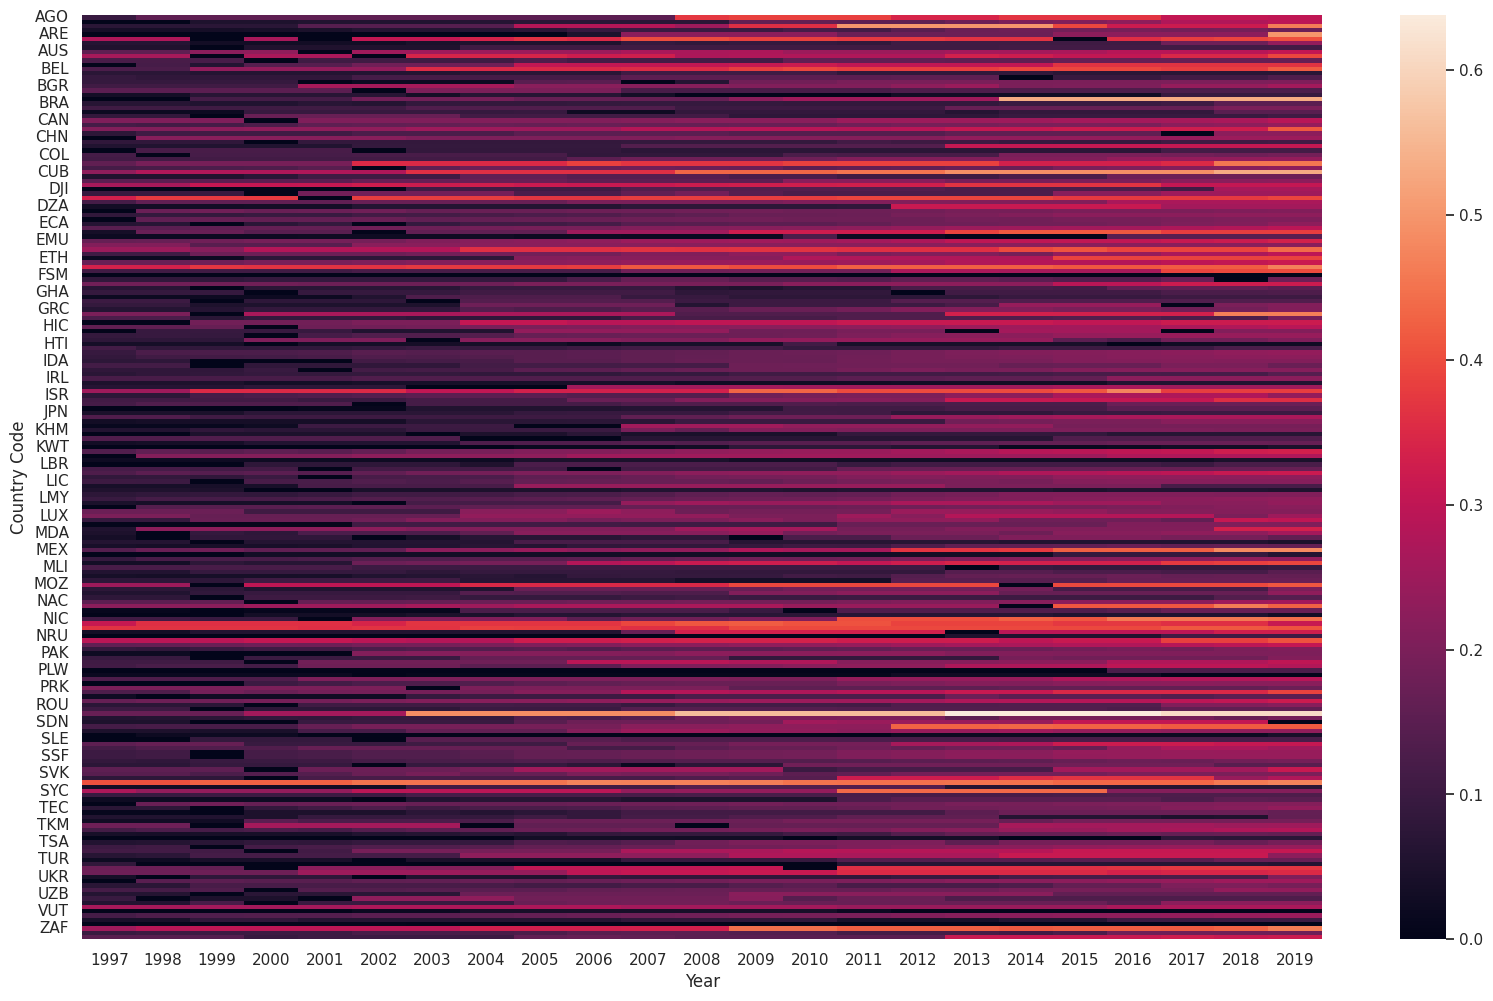

In [94]:
sns.heatmap(datos_pivot,linewidths='0.001')
sns.set(rc={'figure.figsize':(20,12)}) 
# En el gráfico de color observamos la evolución a través de los años el procentaje de representantes mujeres en el parlamento